In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
marketing=pd.read_csv("marketing.csv")
df=marketing.copy()
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [32]:
df.isnull().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

### Dönüşüm Oranı:

ConversionRate= converted / total

In [23]:
df.user_id.value_counts()

a100000882    12
a100000893    10
a100000884    10
a100000894    10
a100000888    10
              ..
a100003232     1
a100000646     1
a100003503     1
a100003743     1
a100001718     1
Name: user_id, Length: 7309, dtype: int64

user_id'si tekrarlayan değerlerin ve converted değerleri True olanlarının elimine edilmesi:

In [108]:
df[df.converted == True]['user_id'].nunique() 

1015

In [104]:
con=df[df.converted == True]['user_id'].nunique() 
users=df.user_id.nunique()
c_rate= round((con/users)*100,3)
print("Dönüşüm Oranı: %",c_rate)

Dönüşüm Oranı: % 13.887


### Tutundurma Oranı:

RetentionRate= retained / converted

In [100]:
ret=df[df.is_retained == True]['user_id'].nunique() 
r_rate=round((ret/con)*100,3)
print("Tutundurma Oranı: %",r_rate)

Tutundurma Oranı: % 66.798


### 19-24 yaş arası dönüşüm oranı:

In [101]:
df.age_group.unique()

array(['0-18 years', '19-24 years', '24-30 years', '30-36 years',
       '36-45 years', '45-55 years', '55+ years'], dtype=object)

In [192]:
con2=df[df.converted == True].groupby([df.age_group=='19-24 years'])['user_id'].nunique().to_dict().get(True)
users2=df.groupby([df.age_group=='19-24 years']).user_id.nunique().to_dict().get(True)
c_rate_age= round((con2/users2)*100,3)
print("19-24 yaş arası dönüşüm oranı: %",c_rate_age)

19-24 yaş arası dönüşüm oranı: % 23.183


### Yaş aralıklarına göre dönüşüm oranı:

In [196]:
cy=df[df.converted == True].groupby([df.age_group])['user_id'].nunique()
cu=df.groupby([df.age_group]).user_id.nunique()
c_age=round((cy/cu)*100,3)
print("Yaş aralıklarına göre yüzdelik dönüşüm oranları:",c_age)

Yaş aralıklarına göre yüzdelik dönüşüm oranları: age_group
0-18 years     15.894
19-24 years    23.183
24-30 years    18.689
30-36 years     7.271
36-45 years     6.994
45-55 years     7.089
55+ years       7.747
Name: user_id, dtype: float64


### Yaş aralıklarına göre dönüşüm oranının çubuk grafiği:

In [272]:
c_age.to_dict().keys()

dict_keys(['0-18 years', '19-24 years', '24-30 years', '30-36 years', '36-45 years', '45-55 years', '55+ years'])

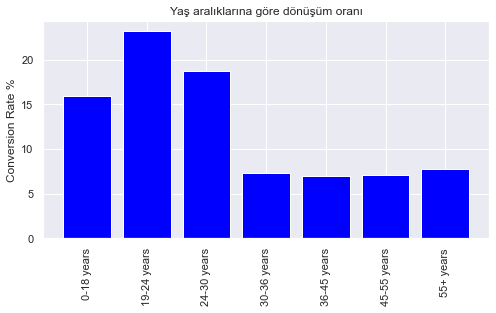

In [307]:
x=c_age.to_dict().keys()
tickvalues = range(0,len(x))
y=c_age.to_dict().values()
plt.figure(figsize=(8,4))

plt.xticks(ticks = tickvalues ,labels = x, rotation = 'vertical')
plt.bar(x, y, color="blue")
plt.ylabel('Conversion Rate %')
plt.title('Yaş aralıklarına göre dönüşüm oranı')
plt.show()